https://notanymike.github.io/Solving-CarRacing/

In [1]:
import gym
import moviepy.editor as mpy
import os
from pyvirtualdisplay import Display

In [2]:
display = Display(visible=0, size=(192, 192))
display.start()

os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [3]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np

In [4]:
env = gym.make('CarRacing-v0')

In [5]:
env.action_space

Box(3,)

In [6]:
env.action_space.high, env.action_space.low

(array([1., 1., 1.], dtype=float32), array([-1.,  0.,  0.], dtype=float32))

In [7]:
def get_random_action():
    action = np.random.random(3)
    action[0] = action[0]*2-1
    return action

In [8]:
get_random_action()

array([-0.80220643,  0.5789259 ,  0.02092633])

In [9]:
def get_discrete_random_action():
    action = np.random.randint(2, size=3)
    action[0] = action[0]*2-1
    return action

In [10]:
get_discrete_random_action()

array([1, 0, 1])

In [11]:
obs = env.reset()

Track generation: 1163..1458 -> 295-tiles track


In [12]:
total_reward = 0
for i in range(45):
    obs,rew,_,_ = env.step([0,  0,  0])
    total_reward = np.amax([rew, total_reward])
    
total_reward

6.702721088435374

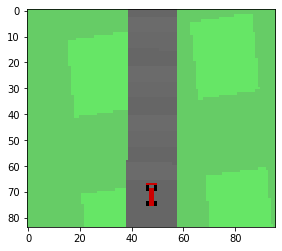

In [13]:
plt.imshow(obs[0:84,:,:])

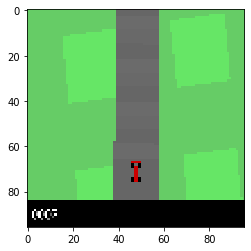

In [14]:
plt.imshow(obs)

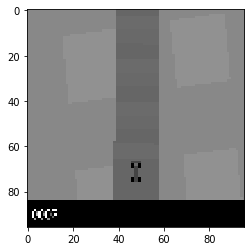

In [15]:
plt.imshow(np.sum(obs,2),'gray')

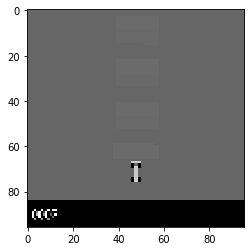

In [16]:
plt.imshow(obs[:,:,0],'gray')

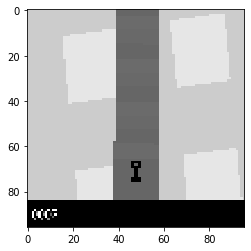

In [17]:
plt.imshow(obs[:,:,1],'gray')

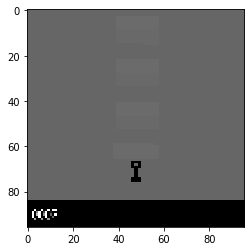

In [18]:
plt.imshow(obs[:,:,2],'gray')

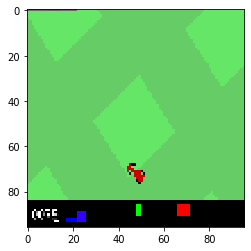

-0.09999999999999432, False, {}, 76.83673469387783, 150

In [19]:
episode = 0
done = False
total_reward = 0  ##
rewards = []
total_rewards = []

while not done and episode<150:  #300
    if episode<70:
        obs, reward, done, info = env.step([0,  .8,  0])
    elif episode<85:
        obs, reward, done, info = env.step([-1,  .8,  0])
    else:
        obs, reward, done, info = env.step([0.1,  .8,  0])
        
    rewards.append(reward)
    total_reward += reward
    total_rewards.append(total_reward)
    clear_output(wait=True)
    
    plt.imshow(obs)
    plt.show()
    
    episode+=1
    print(f'\r{reward}, {done}, {info}, {total_reward}, {episode}', end='')

env.close()

In [ ]:
plt.plot(rewards[:episode-1])
plt.plot(total_rewards[:episode])

In [ ]:
plt.plot(rewards[:episode-1], marker='x')

In [ ]:
rewards